### Logistic Regression is similar to linear regression, but does not use a straight line. It can be used to predict the probability of a condition, unlike a SVM which only classifies a specific condition.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pima = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies','Insulin','BMI','Age']

In [2]:
from sklearn.model_selection import train_test_split

X = pima[feature_cols]

y = pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

print(y.value_counts())
print(y_test.value_counts())

print(len(y_test) / len(y))

0    500
1    268
Name: Outcome, dtype: int64
0    130
1     62
Name: Outcome, dtype: int64
0.25


In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_train.value_counts()[0]

370

In [15]:
y_train.value_counts()[1]

206

In [5]:
print(y_test.values.T)

print(type(y_test.values.T))

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]
<class 'numpy.ndarray'>


In [6]:
def comp_y_test_y_pred(y_test, y_pred):
    
    to_return = list()
    to_return.append([0,0])
    to_return.append([0,0])
    
    for index in range(len(y_pred)):
        
        to_return[y_test[index]][y_pred[index]] += 1
        
    return to_return

confusion_matrix = comp_y_test_y_pred(y_test.values.T, y_pred)

In [7]:
print((confusion_matrix[0][0] + confusion_matrix[1][1]) / len(y_test))

0.6927083333333334


### Could also use this code:

In [8]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.6927083333333334


In [9]:
def accuracy(c_m):
    
    return (c_m[1][1] + c_m[0][0])/(c_m[1][1] + c_m[0][0] + c_m[1][0] + c_m[0][1])

def precision(c_m):
    
    return (c_m[1][1])/(c_m[1][1] + c_m[0][1])

def recall(c_m):
    
    return (c_m[1][1])/(c_m[1][1] + c_m[1][0])

def f1_score(c_m):
    
    prec = precision(c_m)
    rec = recall(c_m)
    return 2 * (prec * rec) / (prec + rec)

#confusion_matrix = [[3,1],[5,3]]

print(accuracy(confusion_matrix))
print(precision(confusion_matrix))
print(recall(confusion_matrix))
print(f1_score(confusion_matrix))

0.6927083333333334
0.5555555555555556
0.24193548387096775
0.3370786516853933


[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438 0.35755557 0.74087965
 0.36050235 0.23012363 0.42654231 0.19103515 0.45763601 0.1190141
 0.43928953 0.36961151 0.44187989 0.37611662 0.19816022 0.41677304
 0.15548281 0.2531671  0.09743077 0.69633712 0.15358309 0.2197836
 0.43094832 0.34216058 0.22396114 0.38073543 0.13342134 0.38790216
 0.47049703 0.16204743 0.29548176 0.30918161 0.27299705 0.38816583
 0.27353443 0.28881041 0.63471914 0.02365251 0.15820648 0.23018375
 0.3484593  0.27580041 0.33264104 0.24880596 0.74489512 0.39001464
 0.41625545 0.13575687 0.18895376 0.64777682 0.18922131 0.05685904
 0.63991547 0.46636382 0.1250972  0.26957602 0.24919104 0.30570396
 0.46376224 0.20963095 0.42847829 0.40762264 0.20169096 0.27027066
 0.26255856 0.57238263 0.45467041 0.27716152 0.58001281 0.41599488
 0.27276101 0.34099223 0.54626578 0.37930723 0.2992205  0.10059169
 0.32872602 0.45101363 0.16036979 0.4896975  0.63230508 0.407384

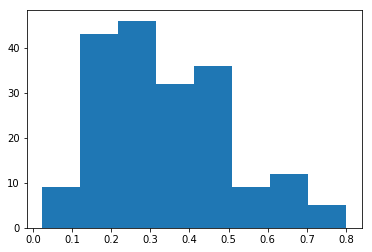

In [20]:
y_pred = logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)

#print(y_pred)
#print(y_pred_prob)

#print(type(y_pred))

print(y_pred_prob[:, 1])
plt.hist(y_pred_prob[:, 1], bins = 8)
plt.show()